**Import TENSORFLOW, KERAS**

In [ ]:
import tensorflow
tensorflow.__version__

'2.13.0'

In [ ]:
# import keras
keras.__version__

'2.13.1'

In [2]:
# tensorflow 버전 확인 (2.13.0)
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.13.0'

**Data setting**

In [ ]:
# keras를 사용하여 dataset 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape # 28x28
X_train_full.dtype # uint8 (0~255)

4422102/4422102 [==============================] - 0s 0us/step


dtype('uint8')

In [ ]:
# validation set 만들기
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # scaling : 0~255 --> 0~1
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# CLASS 이름 list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]] # for example, training set의 1st image = coat

'Coat'

# **Sequential API를 사용한 classification MLP**

MLP 구축, 훈련, 평가, 예측

In [ ]:
# sequential API를 사용하여 model 만들기
# model = keras.models.Sequential() # make a sequential model (keras's basic ANN model)
# model.add(keras.layers.Flatten(input_shape=[28, 28])) # 1st layer (Flatten layer = input image to 1D array; X.reshape(-1, 28*28))
# model.add(keras.layers.Dense(300, activation="relu")) # 2st layer (300 neurons Dense hidden layer with ReLu)
# model.add(keras.layers.Dense(100, activation="relu")) # 3rd layer (100 neurons Dense hidden layer with ReLu)
# model.add(keras.layers.Dense(10, activation="softmax")) # 4th layer (10 neurons Dense output layer, using the softmax activation function)

# OR
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# displays all the model's layers, including each layer's name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model에 있는 층의 list 출력
model.layers

# Index로 layer 선택
hidden1 = model.layers[1]
hidden1.name

# 이름으로 layer 선택
model.get_layer('dense') is hidden1

True

In [ ]:
# layer의 모든 parameter는 get_weights()와 set_weights()를 사용해 접근 가능
weights, biases = hidden1.get_weights()
weights

array([[-0.05387422,  0.06449276, -0.05919906, ...,  0.01881472,
        -0.03510843,  0.04063284],
       [ 0.02933338, -0.04052422,  0.05956444, ..., -0.03700294,
        -0.02938419, -0.04191272],
       [ 0.00425973, -0.03795899, -0.01189125, ..., -0.07288087,
         0.00359827, -0.00948434],
       ...,
       [-0.0295833 ,  0.02289533,  0.01958268, ...,  0.04535731,
         0.02077154, -0.06991845],
       [ 0.04817285, -0.05183751,  0.02384596, ...,  0.04352121,
        -0.02351952,  0.01387976],
       [-0.03196984, -0.02048227, -0.01094676, ...,  0.00962522,
        -0.03340292, -0.01315022]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
# model compile
# loss function = sparse_categorical_crossentropy // sample마다 target index class 1개 & 각 class는 배타적이므로
# optimizer = sgd // SGD로 model training, back propagation 수행

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 3ms/step - loss: 0.7140 - accuracy: 0.7676 - val_loss: 0.5197 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4878 - accuracy: 0.8301 - val_loss: 0.4676 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8448 - val_loss: 0.4429 - val_accuracy: 0.8394
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4155 - accuracy: 0.8533 - val_loss: 0.4215 - val_accuracy: 0.8512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8617 - val_loss: 0.3790 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8675 - val_loss: 0.3909 - val_accuracy: 0.8604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8707 - val_loss: 0.3678 - val_accuracy

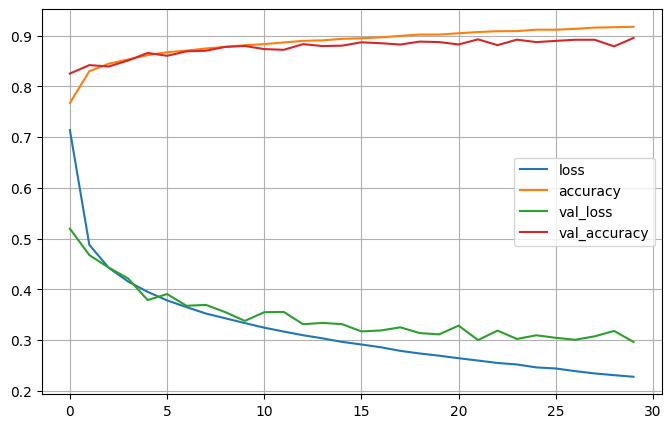

In [ ]:
# check learning curve
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim=(0, 1)
plt.show()

In [ ]:
# testset으로 model evaluation하여 일반화 오차를 추정
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8829


[0.33161577582359314, 0.8828999996185303]

In [ ]:
# model 사용해 predict 만들기
# 새로운 sample에 대해 예측 만들 수 있음
X_new = X_test[:3] # 새로운 sample이라 생각하고.. testset의 처음 3개 sample 사용
y_proba = model.predict(X_new)
y_proba.round(2)

# 각 sample에 대해 class(0~9)마다 각각의 확률을 model이 추정
# array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
#        [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
#        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
#       dtype=float32)


1/1 [==============================] - 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# 가장 높은 확률을 가진 class만 출력
# y_pred = model.predict_classes(X_new) // error
import numpy as np
y_pred = np.argmax(model(X_new), axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# **Sequential API를 사용한 regression MLP**

In [ ]:
# DATASET
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# classification MLP와의 차이점
# 1. output layer : Activation function 없음 (하나의 값을 predict하기 때문)
# 2. Loss function으로 MSE 사용
# 3. (at this dataset) Overfitting 막기 위해 neuron 수가 적은 1개의 hidden layer만 사용

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 2.2949 - val_loss: 0.9958
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8519 - val_loss: 0.7291
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7106 - val_loss: 0.6653
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.6680 - val_loss: 0.6312
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6393 - val_loss: 0.6050
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6148 - val_loss: 0.5840
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5937 - val_loss: 0.5648
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5747 - val_loss: 0.5484
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5582 - val_loss: 0.5331
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5436 - val_loss: 0.5207

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


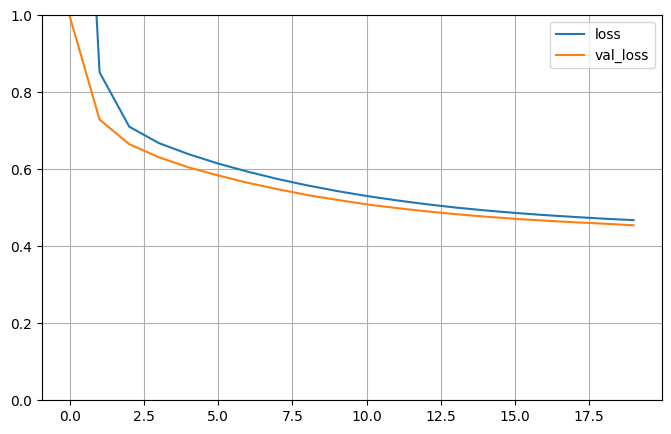

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# **functional API를 사용해 complex model 만들기**
Input, Output이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할 때 사용

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # 1st hidden layer의 output을 input으로 받음
concat = keras.layers.Concatenate()([input_, hidden2]) # Concatenate layer : 2nd hidden layer의 output과 Input을 연결
output = keras.layers.Dense(1)(concat) # Concat layer이 만든 result를 사용해 호출
model = keras.Model(inputs=[input_], outputs=[output]) # 사용할 Input과 Output을 지정하여 keras model을 만듬

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 1.8391 - val_loss: 0.9260
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.8507 - val_loss: 0.7710
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7488 - val_loss: 0.7018
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6939 - val_loss: 0.6567
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6529 - val_loss: 0.6231
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6223 - val_loss: 0.5979
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5990 - val_loss: 0.5781
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5800 - val_loss: 0.5606
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5643 - val_loss: 0.5486
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5537 - val_loss: 0.5374

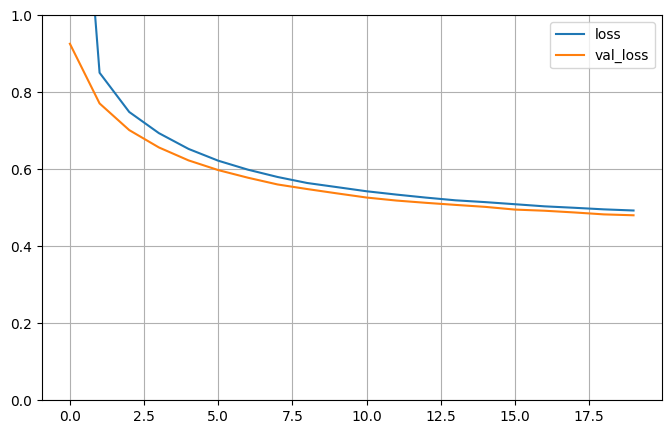

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# 일부 특성은 짧은 경로(wide)로, 다른 특성들은 깊은 경로(deep)로 전달하고 싶을 경우

# Input Layer A
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Input Layer B
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate 2 layer (Input Layer A & Input Layer B)
concat = keras.layers.concatenate([input_A, hidden2])

# Output layer
output = keras.layers.Dense(1, name="output")(concat)

# 사용할 입력과 출력을 지정하여 keras Model 만들기
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9553 - val_loss: 0.8733
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8086 - val_loss: 0.7105
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6947 - val_loss: 0.6515
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6445 - val_loss: 0.6142
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6110 - val_loss: 0.5857
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5859 - val_loss: 0.5642
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5659 - val_loss: 0.5493
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5500 - val_loss: 0.5350
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5382 - val_loss: 0.5240
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5284 - val_loss: 0.5155

In [ ]:
# 규제를 위한 보조 출력 추가하기

# Input Layer A
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Input Layer B
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate 2 layer (Input Layer A & Input Layer B)
concat = keras.layers.concatenate([input_A, hidden2])

# Output layer
output = keras.layers.Dense(1, name="main_output")(concat)

# 보조 출력 추가
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# 사용할 입력과 출력을 지정하여 keras Model 만들기
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd") # 각 출력은 자신만의 loss function이 필요함

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.0737 - main_output_loss: 0.9750 - aux_output_loss: 1.9627 - val_loss: 0.6780 - val_main_output_loss: 0.6084 - val_aux_output_loss: 1.3049
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7000 - main_output_loss: 0.6374 - aux_output_loss: 1.2636 - val_loss: 0.5884 - val_main_output_loss: 0.5304 - val_aux_output_loss: 1.1101
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6206 - main_output_loss: 0.5696 - aux_output_loss: 1.0798 - val_loss: 0.5374 - val_main_output_loss: 0.4904 - val_aux_output_loss: 0.9607
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5720 - main_output_loss: 0.5310 - aux_output_loss: 0.9408 - val_loss: 0.5050 - val_main_output_loss: 0.4673 - val_aux_output_loss: 0.8449
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5080 - main_output_loss: 0.4721 - aux_output_loss: 0.8310 - val_loss

In [ ]:
# model evaluate 이후 개별 손실과 총 손실을 반환
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3642 - main_output_loss: 0.3526 - aux_output_loss: 0.4689


In [ ]:
# 각 출력에 대한 prediction을 반환
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 61ms/step


**Subclassing API로 동적 model 만들기**

Sequential & functional API는 모두 선언적(declarative) : 사용할 layer와 연결 방식을 먼저 정의해야함.
- 장점 : model을 저장하거나 복사, 공유하기 쉬움. model의 구조를 출력하거나 분석하기 좋음. 프레임워크가 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있음. 전체 모델이 층으로 구성된 정적 그래프이므로 debugging하기도 쉬움.
- 단점 : 반복문/조건문을 가진 동적인 구조를 필요로 하는 model인 경우 어려움.

명령형(interative) programming style이 필요한 경우 subclassing API를 사용하는 것이 좋음.

1. Model class를 상속하는 instance를 만듬
2. 생성자 안에서 필요한 layer를 만듬
3. call() method 안에 수행하려는 연산을 기술
4. instance를 사용해 model compile, training, evaluate, predict 수행

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()


In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 2.4145 - output_1_loss: 2.3213 - output_2_loss: 3.2540 - val_loss: 1.0691 - val_output_1_loss: 0.9385 - val_output_2_loss: 2.2449
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.9384 - output_1_loss: 0.8177 - output_2_loss: 2.0245 - val_loss: 0.8260 - val_output_1_loss: 0.7225 - val_output_2_loss: 1.7569
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.8037 - output_1_loss: 0.7058 - output_2_loss: 1.6844 - val_loss: 0.7522 - val_output_1_loss: 0.6632 - val_output_2_loss: 1.5538
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7493 - output_1_loss: 0.6628 - output_2_loss: 1.5272 - val_loss: 0.7141 - val_output_1_loss: 0.6321 - val_output_2_loss: 1.4521
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7162 - output_1_loss: 0.6365 - output_2_loss: 1.4340 - val_loss: 0.6910 - val_output_1_loss: 0.6135 - val_ou

1/1 [==============================] - 0s 66ms/step


In [ ]:
# model 저장 및 복원
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 2.1811 - val_loss: 0.7908
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7597 - val_loss: 0.7184
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7013 - val_loss: 0.6793
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6655 - val_loss: 0.6472
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6372 - val_loss: 0.6195
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6124 - val_loss: 0.5951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5909 - val_loss: 0.5758
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5719 - val_loss: 0.5564
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5547 - val_loss: 0.5406
Epoch 10/10
363/363 [==============================] - 3s 8ms/step - loss: 0.5395 - val_loss: 0.5276

In [ ]:
# Save model
model.save("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model
model = keras.models.load_model("my_keras_model.h5")

**callback 사용하기**

training이 매우 오래걸리는 경우, traing 도중 일정 간격으로 checkpoint를 저장해야함.
callback을 사용하여 fit() method에서 checkpoint를 저장!

In [ ]:
# model만들고 compile
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# callback
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8916
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7071
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6499
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6131
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5848
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5616
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5431
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5276
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5140
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5034


In [ ]:
# training 시 validation set을 사용하면 ModelCheckpoint를 만들 때 save_best_only=True로 지정할 수 있음
# 최상의 validation set 점수에서만 model을 저장하게 됨.
# 긴 training 시간으로 training set에 overfitting될 걱정을 안해도 됨.

#조기종료????
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # best model로 load

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4951 - val_loss: 0.4891
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4865 - val_loss: 0.4818
Epoch 3/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4797 - val_loss: 0.4754
Epoch 4/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4727 - val_loss: 0.4672
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4676 - val_loss: 0.4622
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4626 - val_loss: 0.4550
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4581 - val_loss: 0.4509
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4535 - val_loss: 0.4458
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4492 - val_loss: 0.4429
Epoch 10/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4454 - val_loss: 0.4372

In [ ]:
# 조기종료 방법2 : EarlyStopping callback 사용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4423 - val_loss: 0.4340
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4391 - val_loss: 0.4307
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4355 - val_loss: 0.4269
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4324 - val_loss: 0.4243
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4299 - val_loss: 0.4214
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4271 - val_loss: 0.4182
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4244 - val_loss: 0.4160
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4213 - val_loss: 0.4128
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4190 - val_loss: 0.4095
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4168 - val_lo

In [ ]:
# 사용자 정의 callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

**텐서보드를 사용한 시각화**

In [ ]:
# 텐서보드 로그
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
# model만들고 compile
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])
# my_logs에 저장됨 (train log directory & validataion log directory)

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 2.3225 - val_loss: 1.0067
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8604 - val_loss: 0.7542
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7395 - val_loss: 0.6873
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6935 - val_loss: 0.6500
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6569 - val_loss: 0.6218
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.6267 - val_loss: 0.5941
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6003 - val_loss: 0.5719
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5782 - val_loss: 0.5535
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5593 - val_loss: 0.5389
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5434 - val_loss: 0.5266

In [ ]:
!kill 6771

In [ ]:
%reload_ext tensorboard

In [ ]:
# %load_ext tensorboard
%tensorboard --logdir=./my_logs

<IPython.core.display.Javascript object>

In [ ]:
run_logdir2 = get_run_logdir()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.8937 - val_loss: 0.4525
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4719 - val_loss: 0.3935
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5015 - val_loss: 0.3551
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3785 - val_loss: 0.3468
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3534 - val_loss: 0.3497
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3466 - val_loss: 0.3656
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3396 - val_loss: 0.3302
Epoch 8/30
 54/363 [===>..........................] - ETA: 0s - loss: 0.3174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.3372 - val_loss: 0.3178
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3306 - val_loss: 0.3203
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3242 - val_loss: 0.3238
Epoch 11/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3342 - val_loss: 0.3167
Epoch 12/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3351 - val_loss: 0.3091
Epoch 13/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3210 - val_loss: 0.3175
Epoch 14/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3173 - val_loss: 0.3413
Epoch 15/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3106 - val_loss: 0.3265
Epoch 16/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3077 - val_loss: 0.3088
Epoch 17/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3026 - val_loss: 0.3136
Epo

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    data = (np.random.randn(100) + 2) * step / 100
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2, 32, 32, 3)
    tf.summary.image("my_images", images * step / 1000, step=step)
    texts = ["The step is " + str(step), "Its square is " + str(step**2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2* np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

#**신경망 하이퍼파라미터 튜닝하기**

신경망의 유연성때문에, 조정할 하이퍼파라미터가 많음.


In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [5]:
import tensorflow as tf
from tf.keras.layers import Wrapper

ModuleNotFoundError: ignored

In [3]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

AttributeError: ignored

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

NameError: ignored